<a href="https://colab.research.google.com/github/erinijapranckeviciene/MLdata/blob/main/Klasifikavimas_Eksperimentai_su_isuic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
# ikeliu duomenis is Github, taip patogiau
url="https://raw.githubusercontent.com/erinijapranckeviciene/MLdata/main/Kaggle-data-suic.csv"
data = pd.read_csv(url)

In [3]:
print(data.dtypes)
#print(type(data))

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [4]:
data['generation'].value_counts()


Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [5]:
data['country'].value_counts()
#data['country'].unique()

Iceland                   382
Mauritius                 382
Austria                   382
Netherlands               382
Luxembourg                372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Macau                      12
Dominica                   12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [6]:
data['age'].value_counts()

15-24 years    4642
25-34 years    4642
55-74 years    4642
75+ years      4642
35-54 years    4642
5-14 years     4610
Name: age, dtype: int64

Prieš pradedant darbą visada reikia patikrinti su kokiais duomenimis dirbam ar viskas gerai, 

In [7]:
data.describe(include=['int','int64','float','object'])

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,2321,NaN,6
top,Iceland,NaN,male,15-24 years,NaN,NaN,NaN,Switzerland2003,NaN,"1,160,900,000",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.855000,NaN,24874.000000,NaN


country-year yra kategorinis kintamasisi kuris trukdys
taip pat country, šiuos kintamuosius iškeliam į kitus ir pašalinam iš duomenų matricos

In [8]:
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


Kaip galim modifikuoti stulpelių pavadinimus

In [9]:
data.columns=['country','year', 'sex', 'age', 'suicides_no', 'population','suicides_per_100k','country_year','HDI_for_year','ggdp_for_year','gdp_per_capita','generation']
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100k', 'country_year', 'HDI_for_year', 'ggdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


blogus kintamuosius pasalinam

In [10]:
data_new=data.drop(['country_year','ggdp_for_year','HDI_for_year'], axis=1)
#country=data.country
#print(country)

Pabandyti seaborn įvairiais atvaizdavimo būdais
https://seaborn.pydata.org/examples/horizontal_boxplot.html 

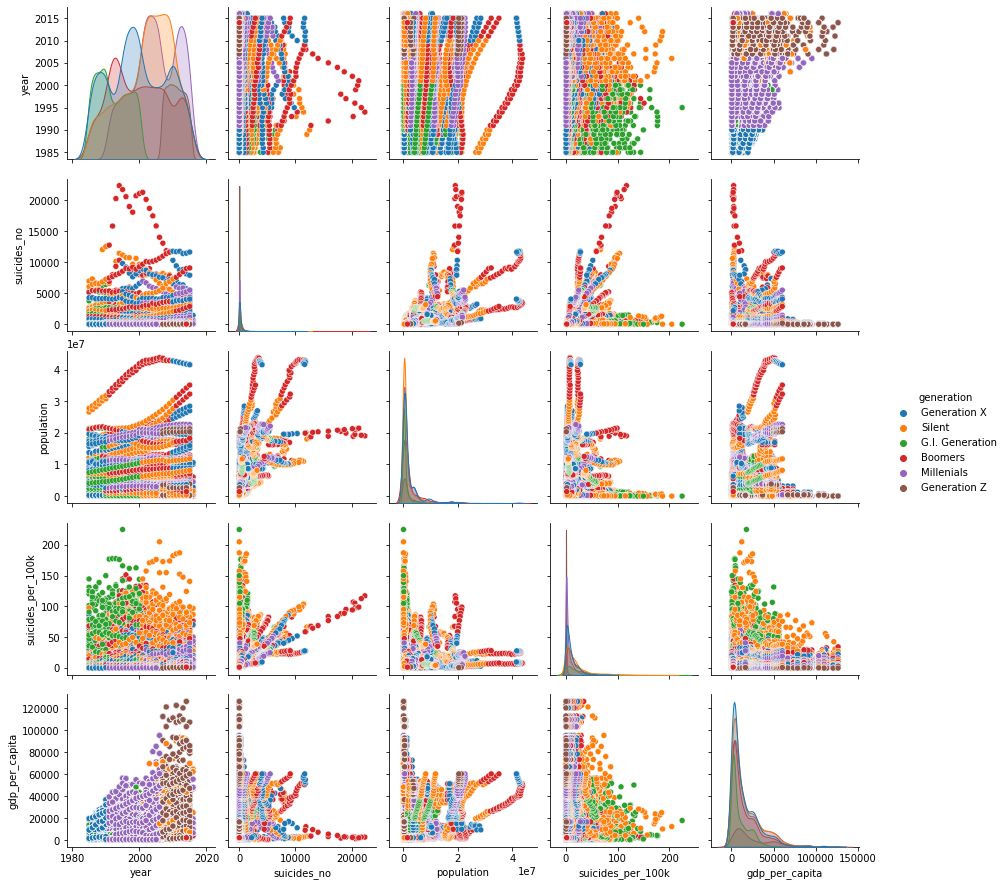

In [ ]:
import seaborn as sns
sns.pairplot(data_new, hue="generation" )

kokį vizualizavimą galime pritaikyti kad pamatytume kurioj šaly yra daugiausiai savižudybių? Gerai tiktų box-whisker plot / reikia surasti funkciją

Kategorinius kintamuosius sex, age, generation, reikia perkoduoti taip, kad jie tiktų klasifikavimui ir regresijai. Panaudojam "one hot encoding" . Kadangi mes turim 101 šalį, įtraukdami į perkodavimą sukurtume šimtą papildomų stulpelių. Todėl šalį prijungiam tada kada perkoduojam kitus požymius.

In [11]:
data_tmp=data.drop(['country','country_year','ggdp_for_year','HDI_for_year'], axis=1)
country=data.country
#print(country)

In [12]:
data_dummies=pd.get_dummies(data_tmp)
list(data_dummies.columns)

['year',
 'suicides_no',
 'population',
 'suicides_per_100k',
 'gdp_per_capita',
 'sex_female',
 'sex_male',
 'age_15-24 years',
 'age_25-34 years',
 'age_35-54 years',
 'age_5-14 years',
 'age_55-74 years',
 'age_75+ years',
 'generation_Boomers',
 'generation_G.I. Generation',
 'generation_Generation X',
 'generation_Generation Z',
 'generation_Millenials',
 'generation_Silent']

prijungiam atgal country

In [13]:
data_ready=pd.concat([country,data_dummies], axis=1)
data_ready.head()

,country,year,suicides_no,population,suicides_per_100k,gdp_per_capita,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,Albania,1987,21,312900,6.71,796,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,Albania,1987,16,308000,5.19,796,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,Albania,1987,14,289700,4.83,796,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,Albania,1987,1,21800,4.59,796,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,Albania,1987,9,274300,3.28,796,0,1,0,1,0,0,0,0,1,0,0,0,0,0


Pasižiūrim reikšmių pasiskirstymus

In [14]:
data_ready.describe(include=['int64','float','object','bool'])

,country,year,suicides_no,population,suicides_per_100k,gdp_per_capita
count,27820,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
unique,101,NaN,NaN,NaN,NaN,NaN
top,Iceland,NaN,NaN,NaN,NaN,NaN
freq,382,NaN,NaN,NaN,NaN,NaN
mean,NaN,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,NaN,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,NaN,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,NaN,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,NaN,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,NaN,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000


Kokius klausimus galėtume paklausti turėdami šiuos duomenis? Kas mūsų "Target"? Pasirinkime suicides ir ištirkime kokie faktoriai geriausiai prognozuoja šį dydį . Mes matom kad suicides_per_100k trečias kvartilis yra 16. Galim skelti į dvi klases Klase 1 suicides_per_100k<=15 ir Klase 2 suicides_per_100k>15, kur savižudybių daugiau negu vidutiniškai. Pabandysime rasti taisyklę su kuria galim atskirti šias dvi klases. 

In [15]:
y=data_ready.suicides_per_100k > 15
X=data_ready.drop(['country','suicides_per_100k'],axis=1)
country=data_ready.country
X.head()

,year,suicides_no,population,gdp_per_capita,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,796,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,796,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1987,14,289700,796,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,796,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,1987,9,274300,796,0,1,0,1,0,0,0,0,1,0,0,0,0,0


Turime pasiruošti duomenis mokymui ir testavimui

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)
y_train.value_counts()
y_test.value_counts()

Training features/target: (20865, 18) (20865,)
Testing features/target: (6955, 18) (6955,)


False    5061
True     1894
Name: suicides_per_100k, dtype: int64

Kadangi šie duomenys yra įvairių duomenų tipų mišinys jiems labai gerai tinka sprendimų medžio ar artimiausio kaimyno klasifikatoriai. Pradedam su sprendimų medžiu.

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)
tree.score(X, y)

0.8258806613946801

Kurie požymiai yra svarbiausi

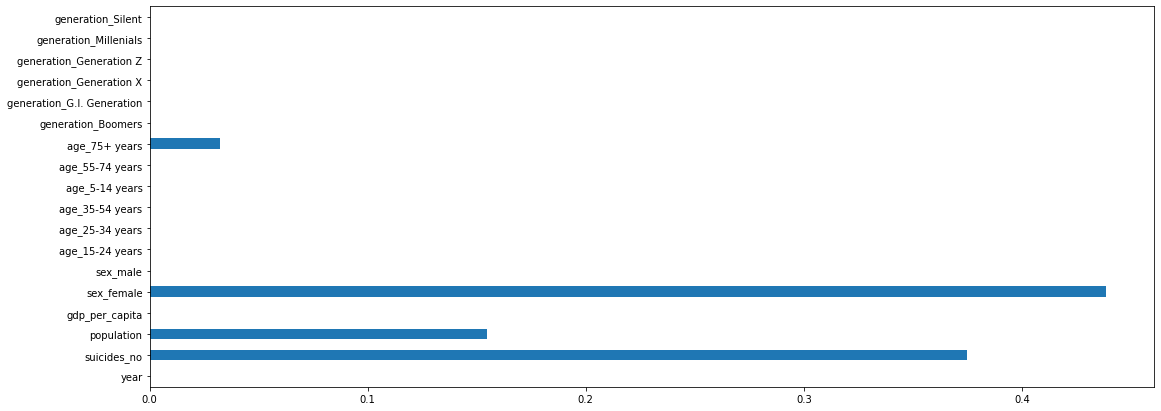

In [18]:
%matplotlib inline
pd.Series(tree.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));

In [19]:
# Figure out where graphviz executable lives
dotpath = !which dot

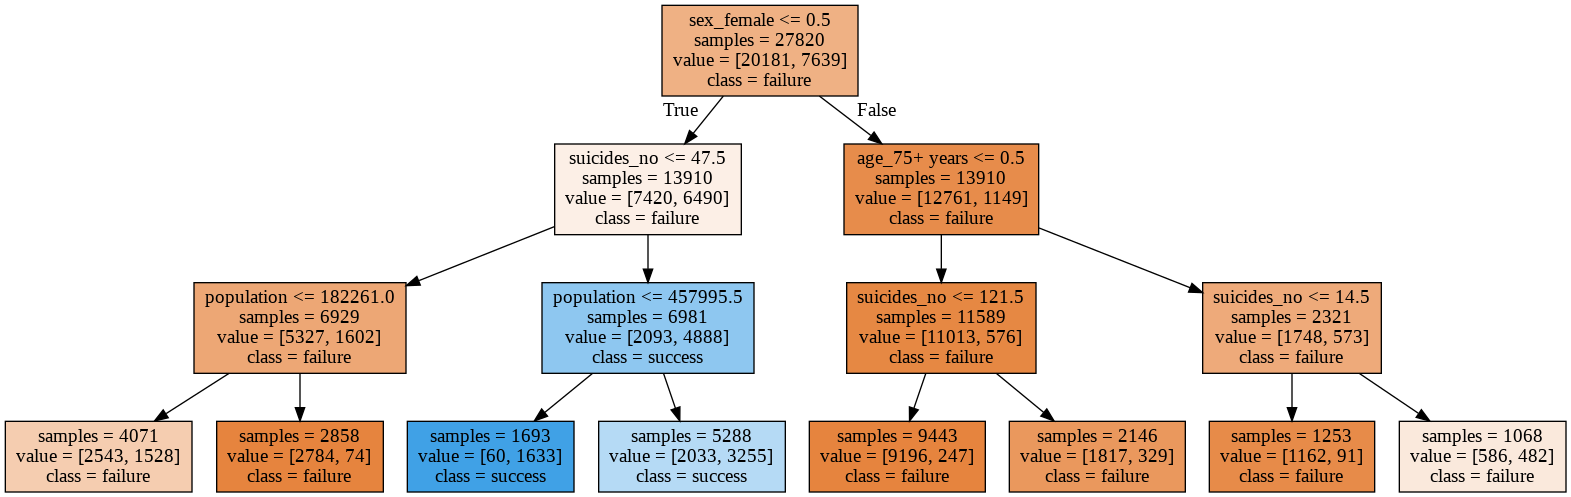

In [ ]:
# Generate cut point diagram
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(tree, feature_names=X.columns, class_names=['failure','success'],
                out_file='ml-good.dot', impurity=False, filled=True)
subprocess.check_call([dotpath[0],'-Tpng','ml-good.dot','-o','ml-good.png'])
Image('ml-good.png')

Greitas klasifikatorių palyginimas
Nuoroda į medžiagą 
https://github.com/DavidMertz/ML-Webinar

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier

classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform', random_state=2),
    "KNN(3)"       : KNeighborsClassifier(3), 
    "RBF SVM"      : SVC(gamma=2, C=1), 
    "Decision Tree": DecisionTreeClassifier(max_depth=7), 
    "Random Forest": RandomForestClassifier(max_depth=7, n_estimators=10, max_features=4), 
    "Neural Net"   : MLPClassifier(alpha=1), 
    "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "Linear SVC"   : LinearSVC(),
    "Linear SVM"   : SVC(kernel="linear"), 
    "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
}

In [24]:
from time import time
from sklearn.metrics import confusion_matrix

nfast = 10      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    y_pred_test = classifier.predict(X_test)
    y_pred_train = classifier.predict(X_train)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))
    print("Confusion table on training data")
    print(confusion_matrix(y_train, y_pred_train))
    print("Confusion table on test data")
    print(confusion_matrix(y_test, y_pred_test))

Dummy          | score = 0.498 | time = 0.001s/0.004s
Confusion table on training data
[[7485 7635]
 [2886 2859]]
Confusion table on test data
[[2504 2557]
 [ 932  962]]
KNN(3)         | score = 0.680 | time = 0.059s/1.124s
Confusion table on training data
[[13982  1138]
 [ 2503  3242]]
Confusion table on test data
[[4195  866]
 [1363  531]]
RBF SVM        | score = 0.728 | time = 76.391s/26.199s
Confusion table on training data
[[15120     0]
 [    0  5745]]
Confusion table on test data
[[5061    0]
 [1894    0]]
Decision Tree  | score = 0.946 | time = 0.062s/0.008s
Confusion table on training data
[[14681   439]
 [  512  5233]]
Confusion table on test data
[[4885  176]
 [ 203 1691]]
Random Forest  | score = 0.889 | time = 0.135s/0.039s
Confusion table on training data
[[14140   980]
 [ 1358  4387]]
Confusion table on test data
[[4763  298]
 [ 476 1418]]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Net     | score = 0.790 | time = 23.568s/0.052s
Confusion table on training data
[[15120     0]
 [ 4468  1277]]
Confusion table on test data
[[5061    0]
 [1458  436]]
AdaBoost       | score = 0.957 | time = 0.951s/0.300s
Confusion table on training data
[[14708   412]
 [  459  5286]]
Confusion table on test data
[[4932  129]
 [ 172 1722]]
Naive Bayes    | score = 0.749 | time = 0.011s/0.013s
Confusion table on training data
[[14599   521]
 [ 4787   958]]
Confusion table on test data
[[4872  189]
 [1559  335]]
QDA            | score = 0.672 | time = 0.021s/0.023s
Confusion table on training data
[[8908 6212]
 [ 785 4960]]
Confusion table on test data
[[3026 2035]
 [ 249 1645]]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Linear SVC     | score = 0.772 | time = 1.782s/0.008s
Confusion table on training data
[[11642  3478]
 [ 1344  4401]]
Confusion table on test data
[[3887 1174]
 [ 413 1481]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Požymių reikšmingumas

In [ ]:
tree = DecisionTreeClassifier(max_depth=7, random_state=0).fit(X, y)
pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False).head(7)

suicides_no        0.484794
population         0.274232
sex_female         0.221572
age_75+ years      0.016245
year               0.001946
age_55-74 years    0.000997
gdp_per_capita     0.000144
dtype: float64

Mes žinom kad suicides_no ir population buvo panaudoti skaičiuojant suicides_per_100K populiacijos. Kas bus jei tuos po=ymius išmesim?

In [ ]:
y=data_ready.suicides_per_100k > 15
X=data_ready.drop(['country','suicides_per_100k','suicides_no','population'],axis=1)
country=data_ready.country
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.head()

,year,gdp_per_capita,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
442,2001,10468,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3431,2014,8849,0,1,0,1,0,0,0,0,0,0,0,0,1,0
8634,2003,3192,1,0,0,0,1,0,0,0,1,0,0,0,0,0
15818,1985,3639,0,1,0,1,0,0,0,0,1,0,0,0,0,0
10256,2004,22804,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
nfast = 10      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))

Dummy          | score = 0.498 | time = 0.004s/0.002s
KNN(3)         | score = 0.766 | time = 0.063s/0.240s
RBF SVM        | score = 0.728 | time = 63.221s/5.015s
Decision Tree  | score = 0.813 | time = 0.037s/0.003s
Random Forest  | score = 0.812 | time = 0.101s/0.009s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Net     | score = 0.727 | time = 23.564s/0.011s
AdaBoost       | score = 0.811 | time = 0.729s/0.061s
Naive Bayes    | score = 0.797 | time = 0.011s/0.004s
QDA            | score = 0.443 | time = 0.019s/0.006s


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Linear SVC     | score = 0.728 | time = 1.644s/0.003s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X, y)
pd.Series(tree1.feature_importances_, index=X.columns).sort_values(ascending=False).head(7)

sex_male           0.550791
age_5-14 years     0.322462
age_15-24 years    0.069686
age_75+ years      0.040382
age_55-74 years    0.013582
year               0.003093
gdp_per_capita     0.000004
dtype: float64

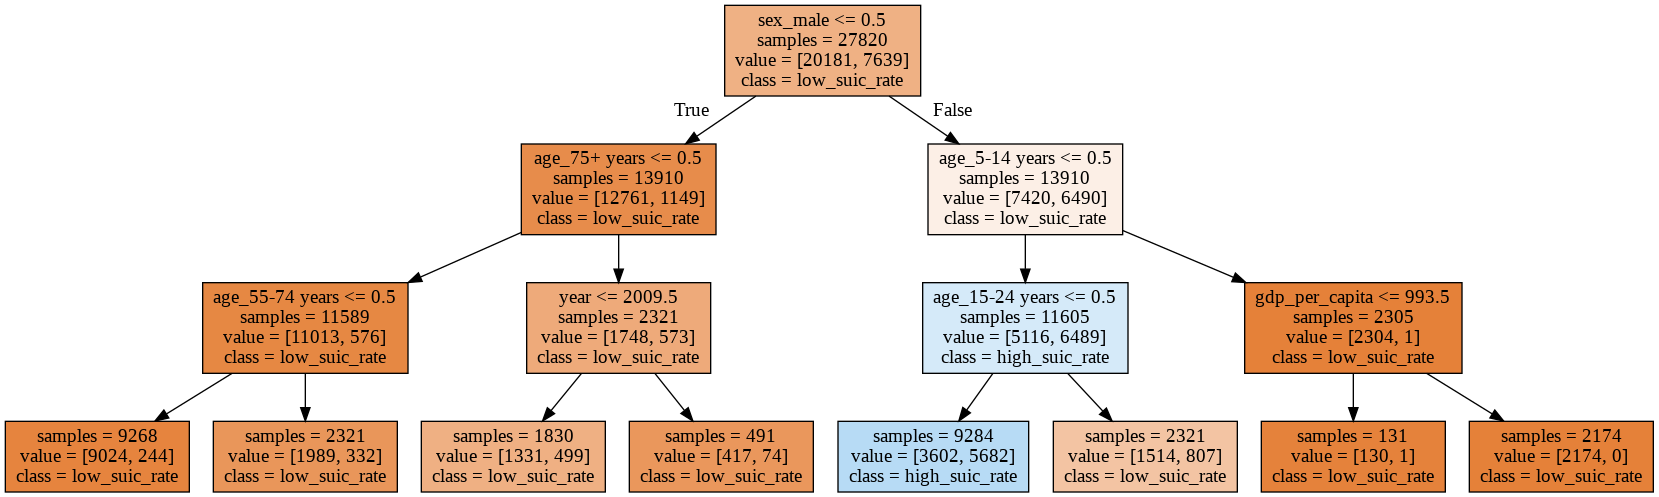

In [ ]:
export_graphviz(tree1, feature_names=X.columns, class_names=['low_suic_rate','high_suic_rate'],
                out_file='ml-good.dot', impurity=False, filled=True)
subprocess.check_call([dotpath[0],'-Tpng','ml-good.dot','-o','ml-good.png'])
Image('ml-good.png')


Iš čia matosi kad reiktų "age" perkoduoti tiesiog skaičiais. O kas gi vistik išryškėtų jei mes prijungiam ir šalis kaip dummy kintamąjį? 